In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI

In [ ]:
evds=evdsAPI('dsIC3fiGlu')


In [57]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
usd

,Tarih,TP_DK_USD_S_YTL
0,2006-2,1.326535
1,2006-3,1.335139
2,2006-4,1.337345
3,2006-5,1.420659
4,2006-6,1.600536
...,...,...
206,2023-4,19.337032
207,2023-5,19.719514
208,2023-6,23.106042
209,2023-7,26.470338


In [56]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
205,2023-3,1269.75
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59


In [32]:
inflation=enf
inflation=pd.DataFrame(inflation)
inflation.columns=["Tarih","TÜFE"]
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
205,2023-3,1269.75
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59


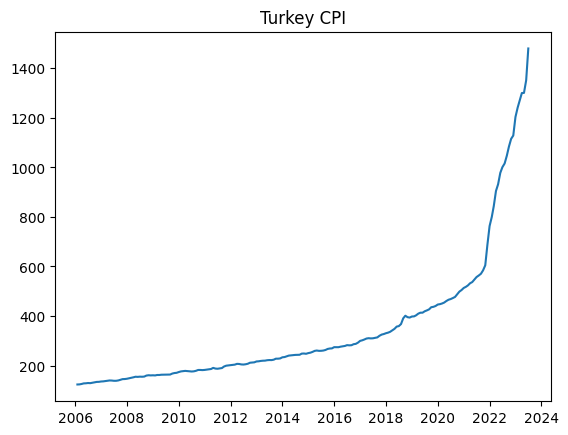

In [58]:
dates=pd.date_range('2006-02-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [59]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
0,1.326535
1,1.335139
2,1.337345
3,1.420659
4,1.600536
...,...
206,19.337032
207,19.719514
208,23.106042
209,26.470338


In [61]:
dates= pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df6=df6.set_index(dates)

df6

,USD/TL
2006-02-01,1.326535
2006-03-01,1.335139
2006-04-01,1.337345
2006-05-01,1.420659
2006-06-01,1.600536
...,...
2023-04-01,19.337032
2023-05-01,19.719514
2023-06-01,23.106042
2023-07-01,26.470338


In [54]:
from datetime import date


'14-08-2023'

In [55]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
206,2023-4,9.505999e+09
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147842e+10


In [68]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money_supply


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
206,2023-4,9.505999e+09
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147842e+10


In [69]:
money_supply=money_supply.set_index(dates)
money_supply["Para Arzi"]=money_supply["Para Arzi"]/1e+08
money_supply
dfn=pd.DataFrame(money_supply)
del dfn["Tarih"]
dfn



,Para Arzi
2006-02-01,2.423895
2006-03-01,2.494857
2006-04-01,2.521919
2006-05-01,2.751947
2006-06-01,2.791388
...,...
2023-04-01,95.059993
2023-05-01,94.093167
2023-06-01,108.345324
2023-07-01,114.784169


In [79]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,2006-2,59.78
1,2006-3,66.06
2,2006-4,72.15
3,2006-5,67.57
4,2006-6,73.20
...,...,...
205,2023-3,79.19
206,2023-4,81.32
207,2023-5,71.98
208,2023-6,74.51


In [80]:

brent1=pd.DataFrame(brent)
brent1.columns=["Tarih","Brent"]
brent1


,Tarih,Brent
0,2006-2,59.78
1,2006-3,66.06
2,2006-4,72.15
3,2006-5,67.57
4,2006-6,73.20
...,...,...
205,2023-3,79.19
206,2023-4,81.32
207,2023-5,71.98
208,2023-6,74.51


In [81]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)

df14["Brent"]=brent1["Brent"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_13304\234948979.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-01,59.78
2006-03-01,66.06
2006-04-01,72.15
2006-05-01,67.57
2006-06-01,73.20
...,...
2023-03-01,79.19
2023-04-01,81.32
2023-05-01,71.98


In [93]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
206,2023-4,8.572114e+09
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09


In [94]:
dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
206,2023-4,85.721139
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952


In [95]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_13304\2513009782.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
TIME,
2006-02-01,1.381847
2006-03-01,1.481222
2006-04-01,1.527510
2006-05-01,1.664881
2006-06-01,1.740395
...,...
2023-04-01,85.721139
2023-05-01,88.043441
2023-06-01,95.646045


In [106]:
faiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
faiz

,Tarih,TP_KTFTUK
0,2006-2,17.2975
1,2006-3,17.0080
2,2006-4,16.2075
3,2006-5,16.3000
4,2006-6,19.6700
...,...,...
206,2023-4,29.2275
207,2023-5,32.0225
208,2023-6,38.5600
209,2023-7,45.8250


In [109]:

dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
faiz=pd.DataFrame(faiz)
faiz.columns=["Tarih","Faiz"]
faiz

,Tarih,Faiz
0,2006-2,17.2975
1,2006-3,17.0080
2,2006-4,16.2075
3,2006-5,16.3000
4,2006-6,19.6700
...,...,...
206,2023-4,29.2275
207,2023-5,32.0225
208,2023-6,38.5600
209,2023-7,45.8250


In [110]:
df4=pd.DataFrame()
df4["Faiz"]=faiz["Faiz"]
df4["TIME"]=dates
df4['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df4['TIME'] =  pd.to_datetime(df4['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df4 = df4.set_index(['TIME'])
df4

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_13304\2598961303.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df4['TIME'] =  pd.to_datetime(df4['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Faiz
TIME,
2006-02-01,17.2975
2006-03-01,17.0080
2006-04-01,16.2075
2006-05-01,16.3000
2006-06-01,19.6700
...,...
2023-04-01,29.2275
2023-05-01,32.0225
2023-06-01,38.5600


In [124]:
X=pd.concat([df6["USD/TL"].head(210),dfn["Para Arzi"].head(210),df14.Brent.head(210),df3.Kredi.head(210),df4["Faiz"].head(210)],axis=1)



In [125]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y


,CPI
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.20
2006-06-01,128.63
...,...
2023-03-01,1269.75
2023-04-01,1300.04
2023-05-01,1300.60
2023-06-01,1351.59


In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [127]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5111.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          1.90e-157
Time:                        11:25:10   Log-Likelihood:                -652.62
No. Observations:                 147   AIC:                             1317.
Df Residuals:                     141   BIC:                             1335.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.4250      9.481      9.010      0.0

In [128]:
results.params

const        85.424961
USD/TL        6.449405
Para Arzi     7.280553
Brent         0.264564
Kredi         3.992321
Faiz          0.043061
dtype: float64

In [205]:
from pmdarima.arima import auto_arima

results = auto_arima(df14, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1471.733, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1407.713, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1456.080, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1387.086, Time=0.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.90 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1399.136, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1389.035, Time=0.64 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1389.041, Time=0.59 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1387.701, Time=0.43 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=4.22 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=1389.082, Time=1.32 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]       

In [40]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df14.astype(float),
                                order=(1,1,0),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


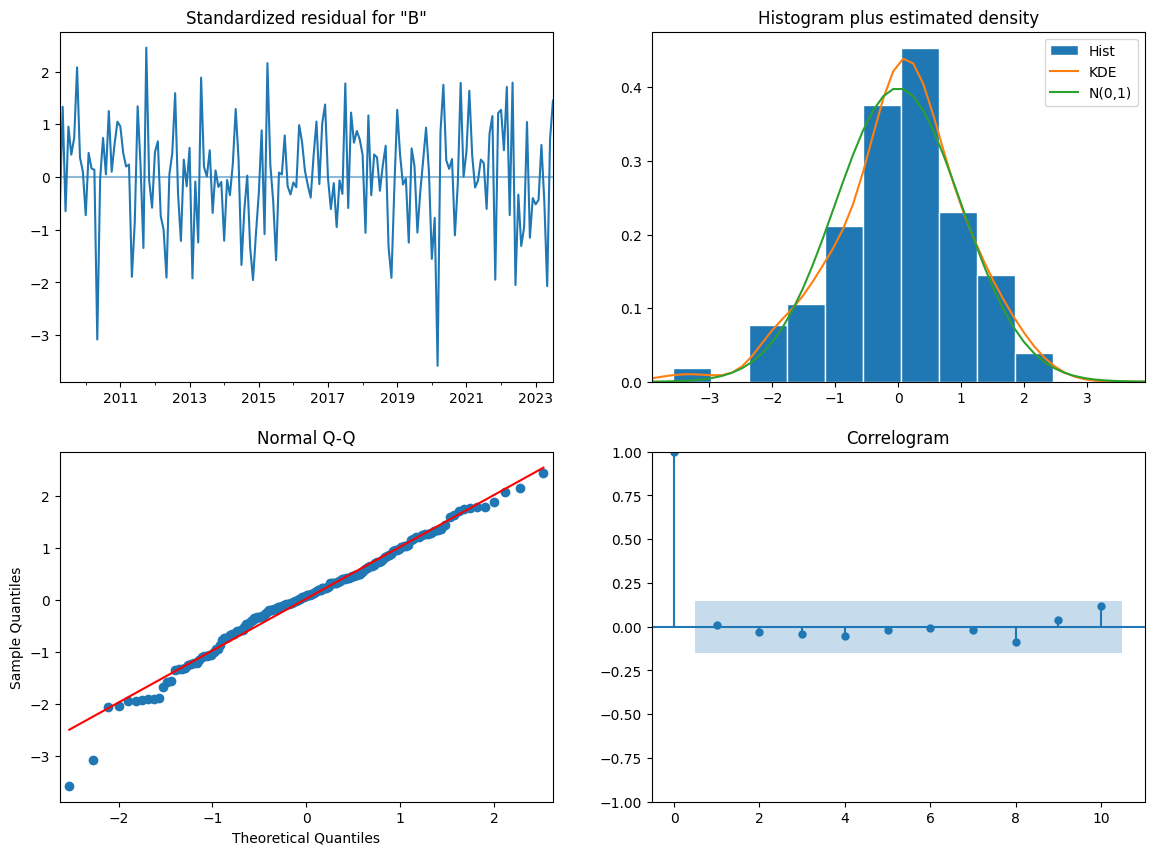

In [41]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

In [42]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [43]:
pred_ci['Predicted'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
pred_ci['Observed'] = df14["Brent"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Brent,upper Brent,Predicted,Observed,"Diff, %%"
2022-10-01,72.181296,101.754105,86.967701,94.83,-8.290941
2022-11-01,79.328938,108.901747,94.115342,85.43,10.166618
2022-12-01,74.132157,103.704966,88.918562,85.91,3.501993
2023-01-01,73.622136,103.194945,88.408541,84.49,4.637875
2023-02-01,72.380142,101.952951,87.166546,83.89,3.905765
2023-03-01,60.406841,89.979650,75.193245,79.77,-5.737439
2023-04-01,68.197888,97.770697,82.984292,79.54,4.330264
2023-05-01,73.491663,103.064472,88.278067,72.66,21.494725
2023-06-01,54.633187,84.205996,69.419592,74.90,-7.316967
2023-07-01,59.716441,89.289250,74.502845,85.43,-12.790770


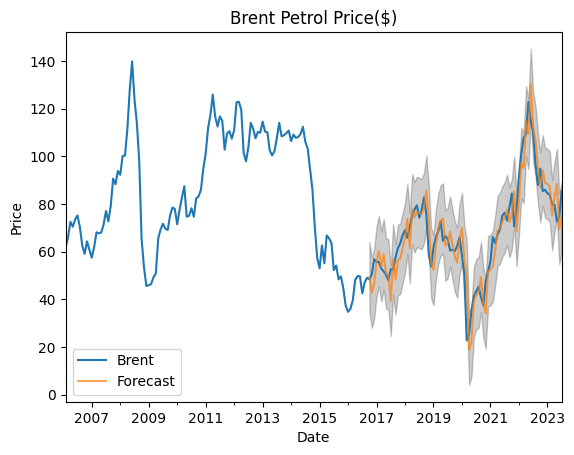

In [44]:
ax = df14['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")
plt.legend()
plt.show()

In [45]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

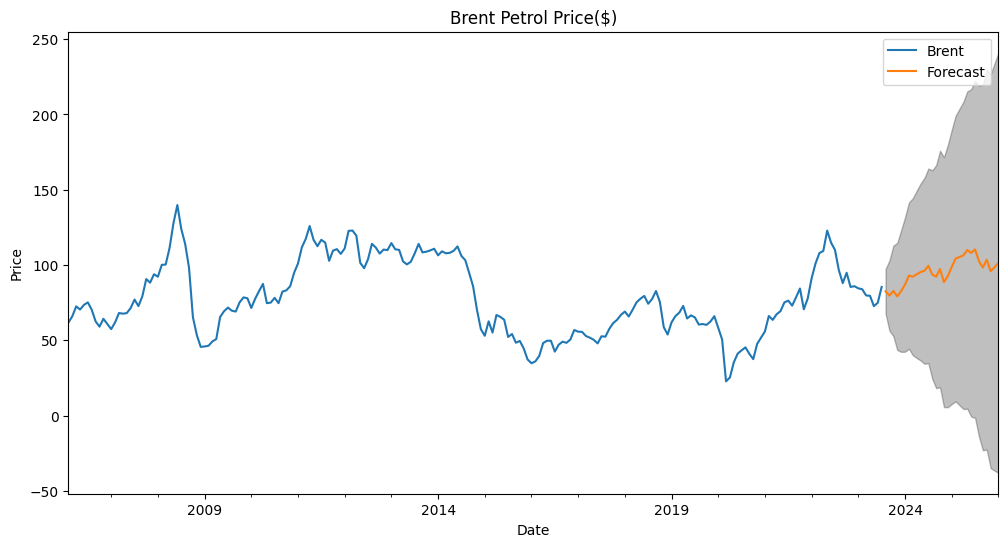

In [46]:
ax = df14.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")

plt.legend()

plt.show()

In [47]:
pred_ci['Mean'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
brenttahmin=pred_ci["Mean"]
brenttahmin

2023-08-01     82.534959
2023-09-01     79.696340
2023-10-01     82.803166
2023-11-01     79.134254
2023-12-01     82.672406
2024-01-01     87.030362
2024-02-01     92.923705
2024-03-01     92.201369
2024-04-01     93.782520
2024-05-01     95.321426
2024-06-01     96.150858
2024-07-01     99.437635
2024-08-01     93.632861
2024-09-01     92.252186
2024-10-01     97.299288
2024-11-01     88.590734
2024-12-01     92.623184
2025-01-01     98.663182
2025-02-01    104.235774
2025-03-01    105.311321
2025-04-01    106.370081
2025-05-01    109.919102
2025-06-01    108.009066
2025-07-01    110.338887
2025-08-01    102.584222
2025-09-01     98.319976
2025-10-01    103.503087
2025-11-01     95.858372
2025-12-01     98.517645
2026-01-01    101.507105
Freq: MS, Name: Mean, dtype: float64

In [70]:
from pmdarima.arima import auto_arima

results = auto_arima(dfn["Para Arzi"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1533.496, Time=1.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1564.078, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1564.970, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1565.782, Time=0.29 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1549.055, Time=0.24 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1535.488, Time=1.11 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1535.487, Time=2.54 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1536.976, Time=0.51 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1564.873, Time=0.31 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1533.457, Time=0.91 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1550.749, Time=0.43 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1535.439, Time=1.39 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=1535.440, Time=2.26 sec
 ARIMA(2,1,1)(1,1,0)[12]

In [48]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(dfn.astype(float),
                                order=(3,1,3),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [50]:
pred_ci['Predicted'] = (pred_ci["lower Para Arzi"] + pred_ci["upper Para Arzi"])/2
pred_ci['Observed'] = dfn["Para Arzi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Para Arzi,upper Para Arzi,Predicted,Observed,"Diff, %%"
2022-10-01,744.353902,783.822650,764.088276,762.841042,0.163498
2022-11-01,776.199804,815.667951,795.933878,791.805383,0.521403
2022-12-01,804.331830,843.799384,824.065607,812.601374,1.410807
2023-01-01,821.316573,860.783543,841.050058,847.850068,-0.802030
2023-02-01,851.407445,890.873840,871.140642,869.495739,0.189179
2023-03-01,884.445895,923.911724,904.178809,891.608848,1.409807
2023-04-01,920.095789,959.561060,939.828424,928.965145,1.169396
2023-05-01,959.044610,998.509332,978.776971,973.520936,0.539900
2023-06-01,1001.829925,1041.294105,1021.562015,962.399015,6.147450
2023-07-01,1022.973209,1062.436856,1042.705032,1110.989571,-6.146281


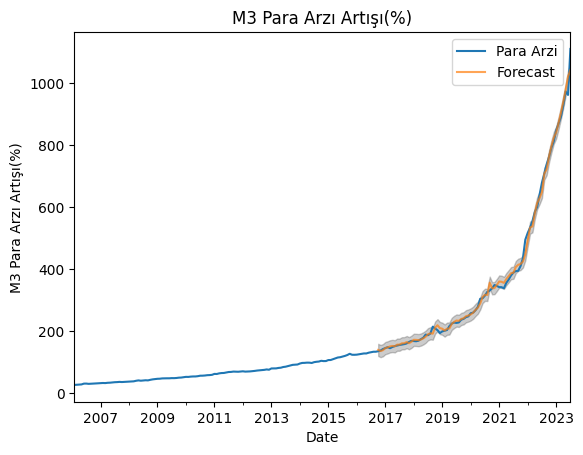

In [51]:
ax = dfn['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('M3 Para Arzı Artışı(%)')
plt.title("M3 Para Arzı Artışı(%)")
plt.legend()
plt.show()

In [52]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

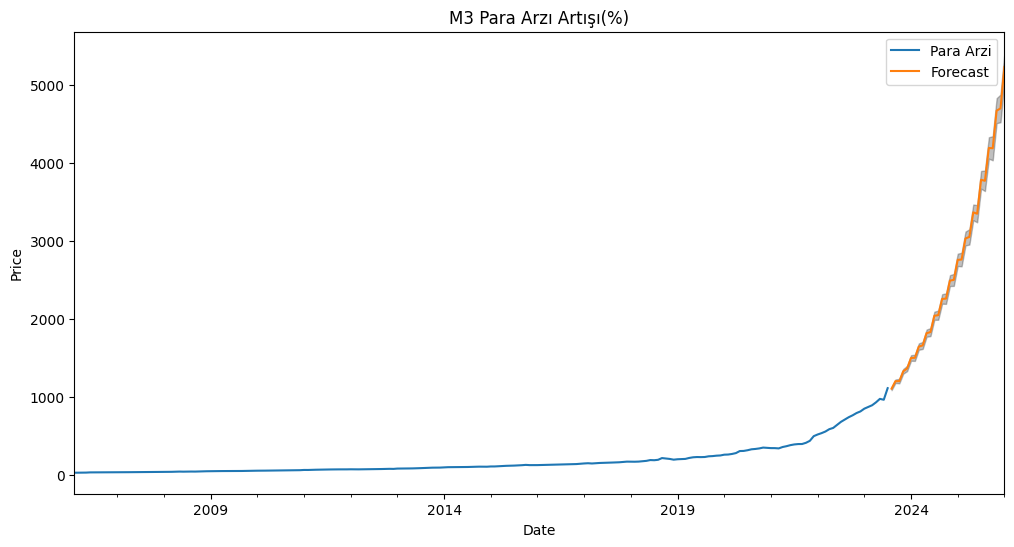

In [53]:
ax = dfn.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("M3 Para Arzı Artışı(%)")

plt.legend()

plt.show()

In [54]:
pred_ci['Mean'] = (pred_ci["lower Para Arzi"] + pred_ci["upper Para Arzi"])/2
paraarzitahmin=pred_ci["Mean"]
paraarzitahmin

2023-08-01    1104.422493
2023-09-01    1200.218529
2023-10-01    1201.532260
2023-11-01    1327.204357
2023-12-01    1363.752151
2024-01-01    1498.450032
2024-02-01    1500.572686
2024-03-01    1644.140656
2024-04-01    1659.724335
2024-05-01    1816.729662
2024-06-01    1830.316783
2024-07-01    2040.301202
2024-08-01    2047.407158
2024-09-01    2255.633750
2024-10-01    2260.060211
2024-11-01    2491.055183
2024-12-01    2500.092026
2025-01-01    2757.374897
2025-02-01    2761.330730
2025-03-01    3031.302014
2025-04-01    3051.782198
2025-05-01    3366.346010
2025-06-01    3349.012075
2025-07-01    3784.206130
2025-08-01    3771.466473
2025-09-01    4193.072908
2025-10-01    4188.935983
2025-11-01    4671.555136
2025-12-01    4700.185856
2026-01-01    5231.207666
Freq: MS, Name: Mean, dtype: float64

In [80]:
from pmdarima.arima import auto_arima

results = auto_arima(df6, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=325.013, Time=1.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=374.324, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=328.134, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=324.438, Time=0.47 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=376.034, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=325.115, Time=0.70 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=325.299, Time=0.81 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=328.610, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=325.954, Time=1.97 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=328.785, Time=0.23 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=323.882, Time=0.43 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=377.512, Time=0.09 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=323.987, Time=0.82 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=324.246, Time=1.65 sec
 ARIMA(0,1,2)(1,1,0)[12]         

In [55]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df6.astype(float),
                                order=(3,1,0),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [57]:
pred_ci['Predicted'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
pred_ci['Observed'] = df6["USD/TL"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower USD/TL,upper USD/TL,Predicted,Observed,"Diff, %%"
2022-10-01,17.649555,19.874352,18.761954,18.6151,0.788895
2022-11-01,17.676692,19.901489,18.789090,18.6121,0.950943
2022-12-01,17.182866,19.407662,18.295264,18.6905,-2.114636
2023-01-01,17.628168,19.852965,18.740566,18.8115,-0.377076
2023-02-01,18.027792,20.252588,19.140190,18.8875,1.337868
2023-03-01,18.419957,20.644753,19.532355,19.1793,1.840814
2023-04-01,18.067139,20.291936,19.179537,19.4530,-1.405762
2023-05-01,18.661756,20.886553,19.774155,20.7596,-4.746938
2023-06-01,20.140617,22.365414,21.253016,26.0511,-18.417973
2023-07-01,26.119934,28.344731,27.232333,26.9368,1.097134


In [58]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

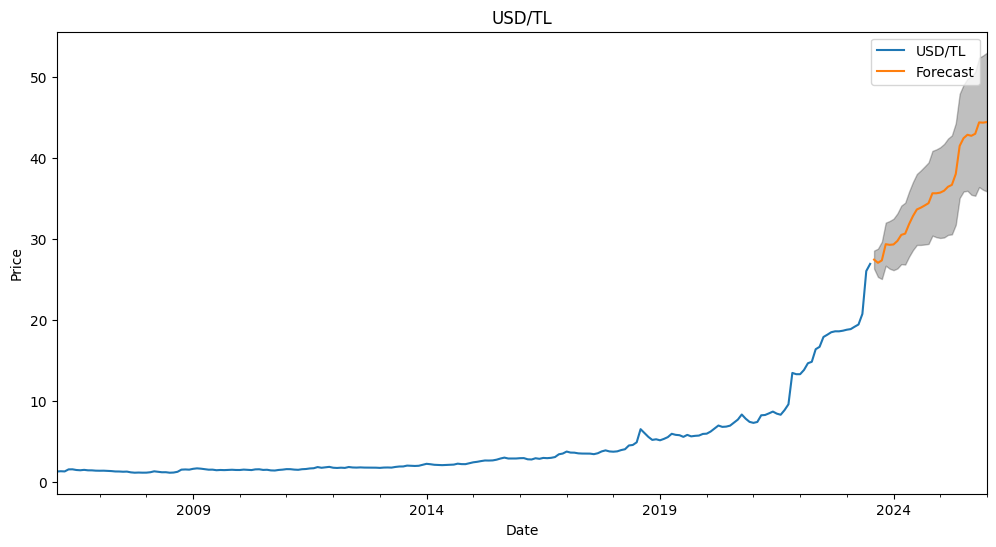

In [59]:
ax = df6.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("USD/TL")

plt.legend()

plt.show()

In [60]:
pred_ci['Mean'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
usdtahmin=pred_ci["Mean"]
usdtahmin

2023-08-01    27.458878
2023-09-01    27.068518
2023-10-01    27.367973
2023-11-01    29.367069
2023-12-01    29.285533
2024-01-01    29.333133
2024-02-01    29.768245
2024-03-01    30.516539
2024-04-01    30.669909
2024-05-01    31.843276
2024-06-01    32.841212
2024-07-01    33.651454
2024-08-01    33.870054
2024-09-01    34.140493
2024-10-01    34.427195
2024-11-01    35.650969
2024-12-01    35.648994
2025-01-01    35.729796
2025-02-01    35.967088
2025-03-01    36.454121
2025-04-01    36.687234
2025-05-01    38.033839
2025-06-01    41.494779
2025-07-01    42.449127
2025-08-01    42.869379
2025-09-01    42.742901
2025-10-01    42.995340
2025-11-01    44.397805
2025-12-01    44.366487
2026-01-01    44.436653
Freq: MS, Name: Mean, dtype: float64

In [316]:
from pmdarima.arima import auto_arima

results = auto_arima(df3, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=7679.414, Time=0.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7764.958, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7718.430, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=7728.504, Time=0.51 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=7730.169, Time=0.38 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=7680.247, Time=1.84 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=7680.458, Time=3.95 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=7684.664, Time=1.45 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=7681.338, Time=6.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=7714.771, Time=0.25 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=7678.368, Time=1.37 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=7732.373, Time=0.33 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=7679.223, Time=1.76 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=7679.423, Time=4.46 sec
 ARIMA(2,1,1)(1,1,0

In [61]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df3.astype(float),
                                order=(3,1,0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [63]:
pred_ci['Predicted'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
pred_ci['Observed'] = df3["Kredi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Kredi,upper Kredi,Predicted,Observed,"Diff, %%"
2022-10-01,659.634225,686.083399,672.858812,675.192551,-0.345641
2022-11-01,681.729939,708.179113,694.954526,695.369957,-0.059742
2022-12-01,701.798666,728.247840,715.023253,728.513389,-1.851735
2023-01-01,733.516613,759.965787,746.741200,750.798093,-0.540344
2023-02-01,758.927931,785.377105,772.152518,771.126924,0.132999
2023-03-01,789.553880,816.003054,802.778467,821.099154,-2.231239
2023-04-01,841.659161,868.108335,854.883748,857.211386,-0.271536
2023-05-01,875.226235,901.675409,888.450822,880.434409,0.910507
2023-06-01,902.055536,928.504157,915.279846,956.460447,-4.305521
2023-07-01,983.482704,1009.931325,996.707014,984.689519,1.220435


In [64]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

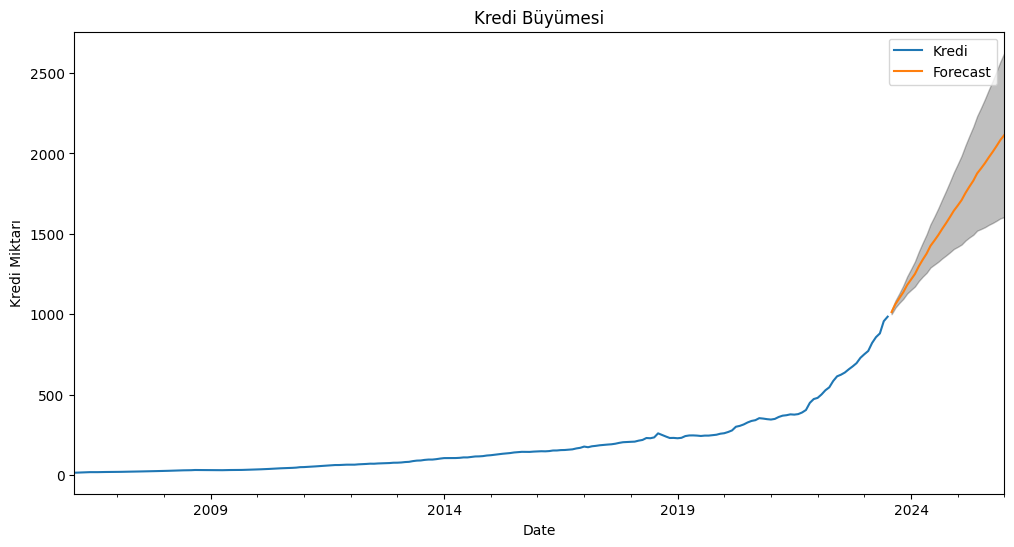

In [65]:
ax = df3.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Kredi Miktarı')
plt.title("Kredi Büyümesi")

plt.legend()

plt.show()

In [66]:
pred_ci['Mean'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
kreditahmin=pred_ci["Mean"]
kreditahmin

2023-08-01    1013.108777
2023-09-01    1062.914969
2023-10-01    1099.569541
2023-11-01    1136.113689
2023-12-01    1181.221069
2024-01-01    1215.355454
2024-02-01    1249.845616
2024-03-01    1297.544841
2024-04-01    1338.660368
2024-05-01    1376.579759
2024-06-01    1424.913658
2024-07-01    1457.676453
2024-08-01    1491.944555
2024-09-01    1530.139759
2024-10-01    1565.999567
2024-11-01    1603.973672
2024-12-01    1643.590465
2025-01-01    1675.719417
2025-02-01    1709.688855
2025-03-01    1754.229952
2025-04-01    1793.263546
2025-05-01    1829.907581
2025-06-01    1876.010681
2025-07-01    1906.867806
2025-08-01    1939.637349
2025-09-01    1976.017641
2025-10-01    2010.169731
2025-11-01    2046.641477
2025-12-01    2084.673738
2026-01-01    2115.268364
Freq: MS, Name: Mean, dtype: float64

In [67]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df4.astype(float),
                                order=(2,1,0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [69]:
pred_ci['Predicted'] = (pred_ci["lower Faiz"] + pred_ci["upper Faiz"])/2
pred_ci['Observed'] = df4["Faiz"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Faiz,upper Faiz,Predicted,Observed,"Diff, %%"
2022-10-01,27.747667,32.856398,30.302033,30.2500,0.172009
2022-11-01,26.626906,31.735637,29.181271,29.6650,-1.630638
2022-12-01,26.883527,31.992258,29.437893,28.7180,2.506765
2023-01-01,24.970852,30.079583,27.525218,28.6800,-4.026438
2023-02-01,25.848379,30.957109,28.402744,28.2550,0.522895
2023-03-01,25.256450,30.365180,27.810815,26.5080,4.914800
2023-04-01,23.311798,28.420528,25.866163,29.2275,-11.500598
2023-05-01,28.958270,34.067000,31.512635,32.0225,-1.592210
2023-06-01,30.988359,36.097088,33.542723,38.5600,-13.011609
2023-07-01,39.843205,44.951935,42.397570,45.8250,-7.479390


In [70]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

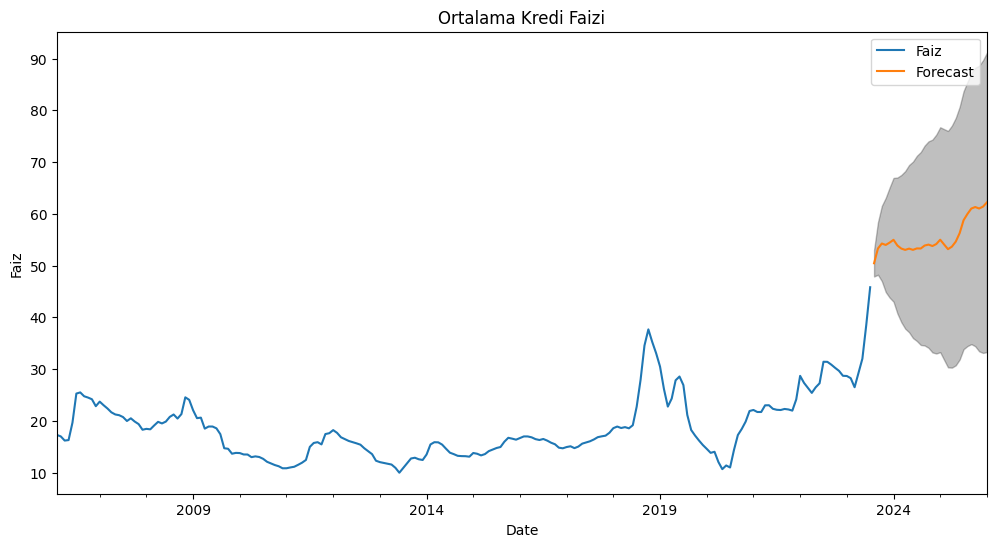

In [71]:
ax = df4.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Faiz')
plt.title("Ortalama Kredi Faizi")

plt.legend()

plt.show()

In [72]:
pred_ci['Mean'] = (pred_ci["lower Faiz"] + pred_ci["upper Faiz"])/2
faiztahmin=pred_ci["Mean"]
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
faiztahmin

,Faiz
2023-08-01,50.454932
2023-09-01,53.304999
2023-10-01,54.270144
2023-11-01,53.990018
2023-12-01,54.443113
2024-01-01,54.983942
2024-02-01,53.882194
2024-03-01,53.291732
2024-04-01,53.040481
2024-05-01,53.281170


In [73]:
dict={'Tarih':["2023-08-01","2023-09-01","2023-10-01","2023-11-01","2023-12-01"],'Inflation':["5.7","4.88","5.58","6.21","6.45"]}
df7=pd.DataFrame.from_dict(dict)
df7.columns=["Tarih","Inflation"]



df7

,Tarih,Inflation
0,2023-08-01,5.7
1,2023-09-01,4.88
2,2023-10-01,5.58
3,2023-11-01,6.21
4,2023-12-01,6.45


In [74]:
inflationnew=[54,56.2,59.69,64.85,73.43]
dates=pd.date_range('2023-08-01','2024-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
inflationpr=pd.DataFrame()
inflationpr["Inflation"]=inflationnew
inflationpr=inflationpr.set_index(dates)
inflation1=enflasyon.loc[82:101,:]
inflation1

,Tüketici fiyat endeks rakamları (2003=100),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
82,2004,10.59,9.48,8.4,7.87,7.31,7.08,7.79,8.45,8.01,9.43,9.47,9.35
83,2005,9.23,8.69,7.94,8.18,8.7,8.95,7.82,7.91,7.99,7.52,7.61,7.72
84,2006,7.93,8.15,8.16,8.83,9.86,10.12,11.69,10.26,10.55,9.98,9.86,9.65
85,2007,9.93,10.16,10.86,10.72,9.23,8.6,6.9,7.39,7.12,7.7,8.4,8.39
86,2008,8.17,9.1,9.15,9.66,10.74,10.61,12.06,11.77,11.13,11.99,10.76,10.06
87,2009,9.5,7.73,7.89,6.13,5.24,5.73,5.39,5.33,5.27,5.08,5.53,6.53
88,2010,8.19,10.13,9.56,10.19,9.1,8.37,7.58,8.33,9.24,8.62,7.29,6.4
89,2011,4.9,4.16,3.99,4.26,7.17,6.24,6.31,6.65,6.15,7.66,9.48,10.45
90,2012,10.61,10.43,10.43,11.14,8.28,8.87,9.07,8.88,9.19,7.8,6.37,6.16
91,2013,7.31,7.03,7.29,6.13,6.51,8.3,8.88,8.17,7.88,7.71,7.32,7.4


In [75]:
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin['Tahmin'] = usdtahmin["Mean"].pct_change() * 100

# İlk satırdaki değerlere NaN dönecektir, bunları 0 ile dolduralım
usdtahmin["Tahmin"].fillna(0, inplace=True)
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.iloc[0,1]=1.81
usdtahmin

,Mean,Tahmin
2023-08-01,27.458878,1.810000
2023-09-01,27.068518,-1.421616
2023-10-01,27.367973,1.106287
2023-11-01,29.367069,7.304509
2023-12-01,29.285533,-0.277645
2024-01-01,29.333133,0.162538
2024-02-01,29.768245,1.483345
2024-03-01,30.516539,2.513732
2024-04-01,30.669909,0.502582
2024-05-01,31.843276,3.825790


In [76]:
brenttahmin=pd.DataFrame(brenttahmin)
brenttahmin['Tahmin'] = brenttahmin["Mean"].pct_change() * 100

# İlk satırdaki değerlere NaN dönecektir, bunları 0 ile dolduralım
brenttahmin["Tahmin"].fillna(0, inplace=True)
brenttahmin=pd.DataFrame(brenttahmin)
brenttahmin.iloc[0,1]=-3
brenttahmin

,Mean,Tahmin
2023-08-01,82.534959,-3.000000
2023-09-01,79.696340,-3.439293
2023-10-01,82.803166,3.898330
2023-11-01,79.134254,-4.430885
2023-12-01,82.672406,4.471076
2024-01-01,87.030362,5.271355
2024-02-01,92.923705,6.771594
2024-03-01,92.201369,-0.777343
2024-04-01,93.782520,1.714888
2024-05-01,95.321426,1.640930


In [77]:
kreditahmin=pd.DataFrame(kreditahmin)
kreditahmin['Tahmin'] = kreditahmin["Mean"].pct_change() * 100

# İlk satırdaki değerlere NaN dönecektir, bunları 0 ile dolduralım
kreditahmin["Tahmin"].fillna(0, inplace=True)
kreditahmin=pd.DataFrame(kreditahmin)
kreditahmin

,Mean,Tahmin
2023-08-01,1013.108777,0.000000
2023-09-01,1062.914969,4.916174
2023-10-01,1099.569541,3.448495
2023-11-01,1136.113689,3.323496
2023-12-01,1181.221069,3.970323
2024-01-01,1215.355454,2.889754
2024-02-01,1249.845616,2.837866
2024-03-01,1297.544841,3.816409
2024-04-01,1338.660368,3.168717
2024-05-01,1376.579759,2.832637


In [78]:
paraarzitahmin=pd.DataFrame(paraarzitahmin)
paraarzitahmin.columns=["Tahmin"]
paraarzitahmin

,Tahmin
2023-08-01,1104.422493
2023-09-01,1200.218529
2023-10-01,1201.532260
2023-11-01,1327.204357
2023-12-01,1363.752151
2024-01-01,1498.450032
2024-02-01,1500.572686
2024-03-01,1644.140656
2024-04-01,1659.724335
2024-05-01,1816.729662


In [99]:
res2=[]

for i in range(30):
    res2.append(results.params["const"]+results.params["USD/TL"]*usdtahmin["Tahmin"][i]+results.params["Para Arzi"]*paraarzitahmin["Tahmin"][i]+results.params["Kredi"]*kreditahmin["Mean"][i]+results.params["Brent"]*brenttahmin["Mean"][i]+results.params["Faiz"]*faiztahmin["Faiz"][i]
)


df9=pd.DataFrame()
dates=pd.date_range('2023-08-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)
df9["Inflation"]=res2
df9['TIME']=dates
df9=df9.set_index(dates)
del df9['TIME']
df9

,Inflation
2023-08-01,1519.852048
2023-09-01,1633.699184
2023-10-01,1644.475334
2023-11-01,1776.295123
2023-12-01,1832.543250
2024-01-01,1979.669909
2024-02-01,1991.344341
2024-03-01,2148.867236
2024-04-01,2177.749005
2024-05-01,2345.512213


In [84]:
tüfe=enflasyon.iloc[6:24,:]
tüfe = tüfe.set_axis(["Yil","Ocak","Şubat","Mart","Nisan","Mayis","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasim","Aralik"], axis=1)
del tüfe["Yil"]
tüfe

,Ocak,Şubat,Mart,Nisan,Mayis,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasim,Aralik
6,123.57,123.84,124.18,125.84,128.2,128.63,129.72,129.15,130.81,132.47,134.18,134.49
7,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.7,140.13,142.67,145.45,145.77
8,146.94,148.84,150.27,152.79,155.07,154.51,155.4,155.02,155.72,159.77,161.1,160.44
9,160.9,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91
10,174.07,176.59,177.62,178.68,178.04,177.04,176.19,176.9,179.07,182.35,182.4,181.85
11,182.6,183.93,184.7,186.3,190.81,188.08,187.31,188.67,190.09,196.31,199.7,200.85
12,201.98,203.12,203.96,207.05,206.61,204.76,204.29,205.43,207.55,211.62,212.42,213.23
13,216.74,217.39,218.83,219.75,220.07,221.75,222.44,222.21,223.91,227.94,227.96,229.01
14,233.54,234.54,237.18,240.37,241.32,242.07,243.17,243.4,243.74,248.37,248.82,247.72
15,250.45,252.24,255.23,259.39,260.85,259.51,259.74,260.78,263.11,267.2,268.98,269.54


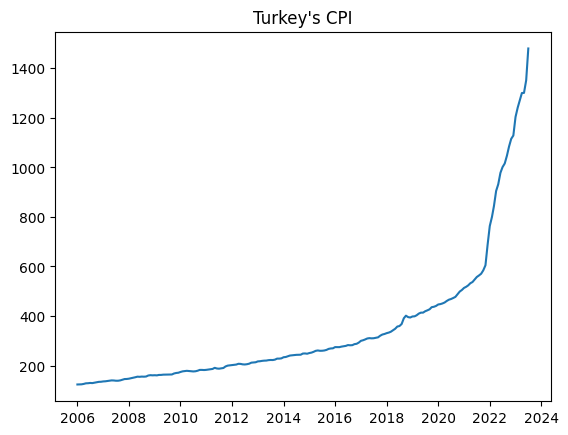

In [100]:
dates=pd.date_range('2006-01-01','2024-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
df10=pd.DataFrame()

v=np.array(tüfe.values)
v=v.flatten()
df10["Inflation"]=v
df10=df10.set_index(dates)
df10=df10.dropna(axis=0)
plt.figure()
plt.title("Turkey's CPI")

plt.plot(df10)
plt.show()

In [101]:

df10

,Inflation
2006-01-01,123.57
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.2
...,...
2023-03-01,1269.75
2023-04-01,1300.04
2023-05-01,1300.6
2023-06-01,1351.59


In [102]:
df10=pd.concat([df10,df9],axis=0)
df10

,Inflation
2006-01-01,123.57
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.2
...,...
2025-09-01,4928.70874
2025-10-01,4934.726972
2025-11-01,5430.307764
2025-12-01,5473.142036


In [108]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
df10['onceki_yil_tufe'] = df10['Inflation'].shift(12)

# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
df10['yillik_enflasyon_orani'] = ((df10['Inflation'] / df10['onceki_yil_tufe']) - 1) * 100

# NaN değerleri (ilk 12 ay) veriden çıkarın
df10.dropna(inplace=True)

# Sonuçları başka bir DataFrame'e kopyalayın (gerekirse)
result_df = df10[['yillik_enflasyon_orani']].copy()

result_df


,yillik_enflasyon_orani
2007-01-01,9.929595
2007-02-01,10.158269
2007-03-01,10.863263
2007-04-01,10.719962
2007-05-01,9.227769
...,...
2025-09-01,73.870837
2025-10-01,73.123272
2025-11-01,75.695189
2025-12-01,75.720402


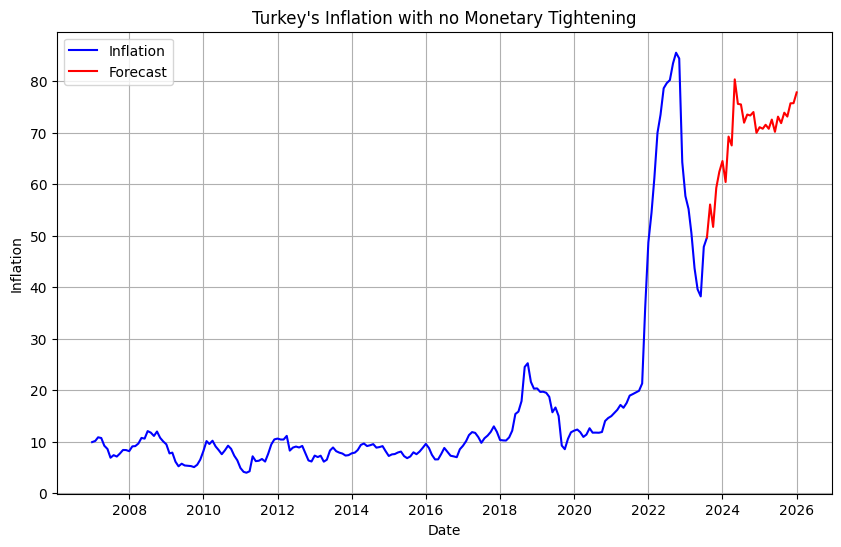

In [117]:
dates=pd.date_range('2006-01-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)





forecast=df10.iloc[199:230,1]

# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(df10.iloc[:200]["yillik_enflasyon_orani"], label='Inflation', color='blue')
plt.plot(df10.iloc[199:230]["yillik_enflasyon_orani"],label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title("Turkey's Inflation with no Monetary Tightening")
plt.legend()
plt.grid(True)
plt.show()
